# GOATOOLS: A Python library for Gene Ontology analyses

D. V. Klopfenstein, Liangsheng Zhang, Brent S. Pedersen, Fidel Ramírez, Alex Warwick Vesztrocy, Aurélien Naldi, Christopher J. Mungall, Jeffrey M. Yunes, Olga Botvinnik, Mark Weigel, Will Dampier, Christophe Dessimoz, Patrick Flick, Haibao Tang

# International Group of Contributors

* School of Biomedical Engineering, Science, and Health Systems, Drexel University, **Philadelphia, PA, USA**
* Center for Genomics and Biotechnology, Fujian Agriculture and Forestry University, **Fuzhou, China**
* Department of Human Genetics, University of **Utah, Salt Lake City, UT, USA**
* Max Planck Institute of Immunobiology and Epigenetics, **Freiburg, Germany**
* Department of Computational Biology, University of Lausanne, **Lausanne, Switzerland**
* Center for Integrative Genomics, University of Lausanne, **Lausanne, Switzerland**
* Division of Environmental Genomics and Systems Biology, Lawrence Berkeley National Laboratory, **Berkeley, CA, USA**
* UC Berkeley - UCSF Graduate Program in Bioengineering, University of California, **San Francisco, CA, USA**
* Bioinformatics and Systems Biology Program, University of California, **San Diego, CA, USA**
* Independent Researcher, **Philadelphia, PA, USA**
* Department of Microbiology and immunology, Drexel University College of Medicine, **Philadelphia, PA, USA**
* School of Computational Science and Engineering, Georgia Institute of Technology, **Atlanta, GA, USA**

# From Universities all over the World

* School of Biomedical Engineering, Science, and Health Systems, **Drexel University**, Philadelphia, PA, USA
* Center for Genomics and Biotechnology, **Fujian Agriculture and Forestry University**, Fuzhou, China
* Department of Human Genetics, **University of Utah**, Salt Lake City, UT, USA
* **Max Planck Institute of Immunobiology and Epigenetics**, Freiburg, Germany
* Department of Computational Biology, **University of Lausanne**, Lausanne, Switzerland
* Center for Integrative Genomics, **University of Lausanne**, Lausanne, Switzerland
* Division of Environmental Genomics and Systems Biology, **Lawrence Berkeley National Laboratory**, Berkeley, CA, USA
* **UC Berkeley** - UCSF Graduate Program in Bioengineering, University of California, San Francisco, CA, USA
* Bioinformatics and Systems Biology Program, **University of California, San Diego**, CA, USA
* Department of Microbiology and immunology, **Drexel University College of Medicine**, Philadelphia, PA, USA
* School of Computational Science and Engineering, **Georgia Institute of Technology**, Atlanta, GA, USA

## Why
Gene Ontology (GO) is used to describe gene products in a computationally acessible manner. 

The GOATOOLS Python library and scripts can be used to: 

* Feature set for genes and gene products
* Query the GO and its annotations to gene producs
* Run enrichment analyses on sets of genes
* Group GO terms using the researchers knowledge

# What is Gene Ontology?

A set of terms that describe gene product functions.

# GO Term: germinal center formation

fieldname       | value
----------------|---------------------
id              | GO:0002467
name            | germinal center formation
def             | The process in which germinal centers form. A germinal center is a specialized microenvironment formed when activated B cells enter lymphoid follicles. Germinal centers are the foci for B cell proliferation and somatic hypermutation. 
GO_REF:0000022  |https://github.com/geneontology/go-site/blob/master/metadata/gorefs/goref-0000022.md
ISBN:081533642X |![book](images/BookImmunology50.png)

# GO Terms are related to one another
![GO relationships](images/fig2.png)

# Three Branches

GO Term    | NS |  dcnt |level|depth| branch
-----------|----|-------|-----|-----|--------------------
GO:0008150 | BP | 29698 | L00 | D00 | biological_process
GO:0003674 | MF | 11147 | L00 | D00 | molecular_function
GO:0005575 | CC |  4201 | L00 | D00 | cellular_component


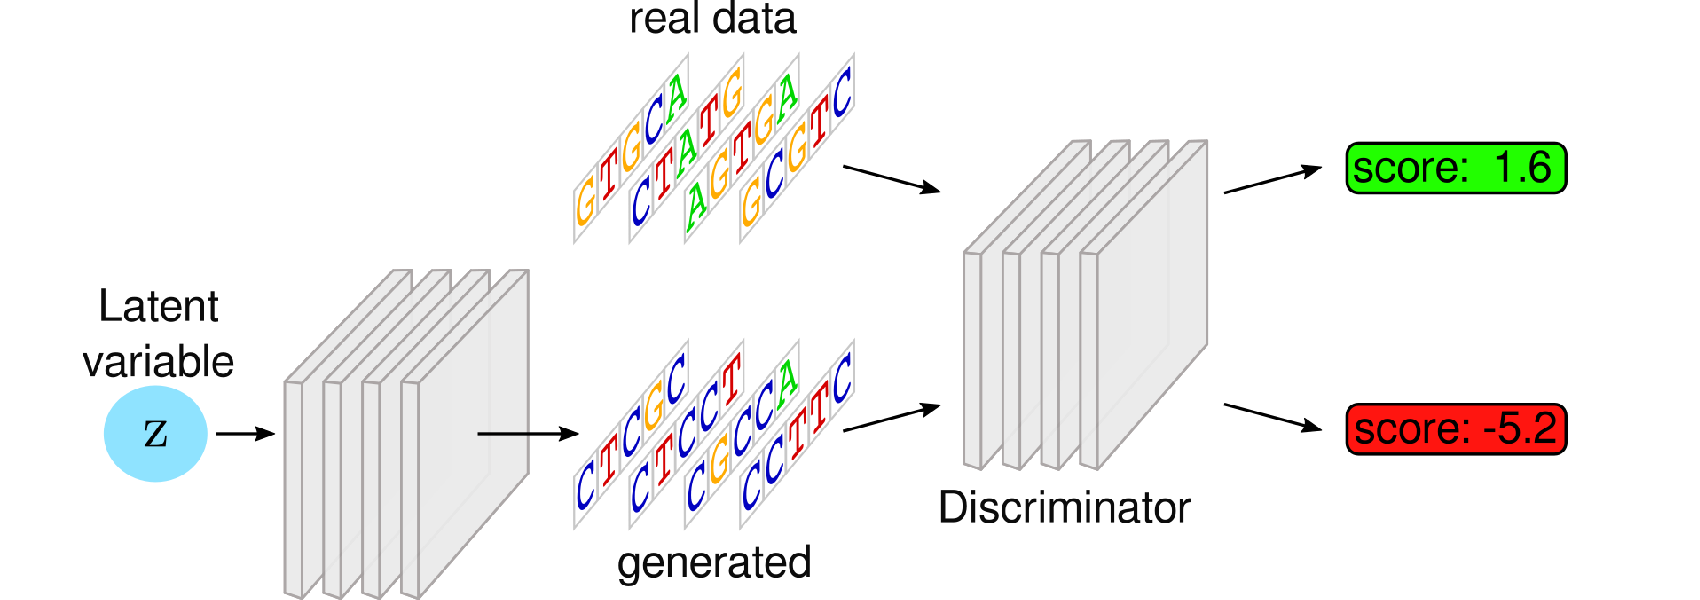

In [6]:
get_fig_from_page(2, 600)

Uses a Wasserstein GAN strategy. Here the discriminator produces a *continious* output instead of the traditional Fake/Real binary call.

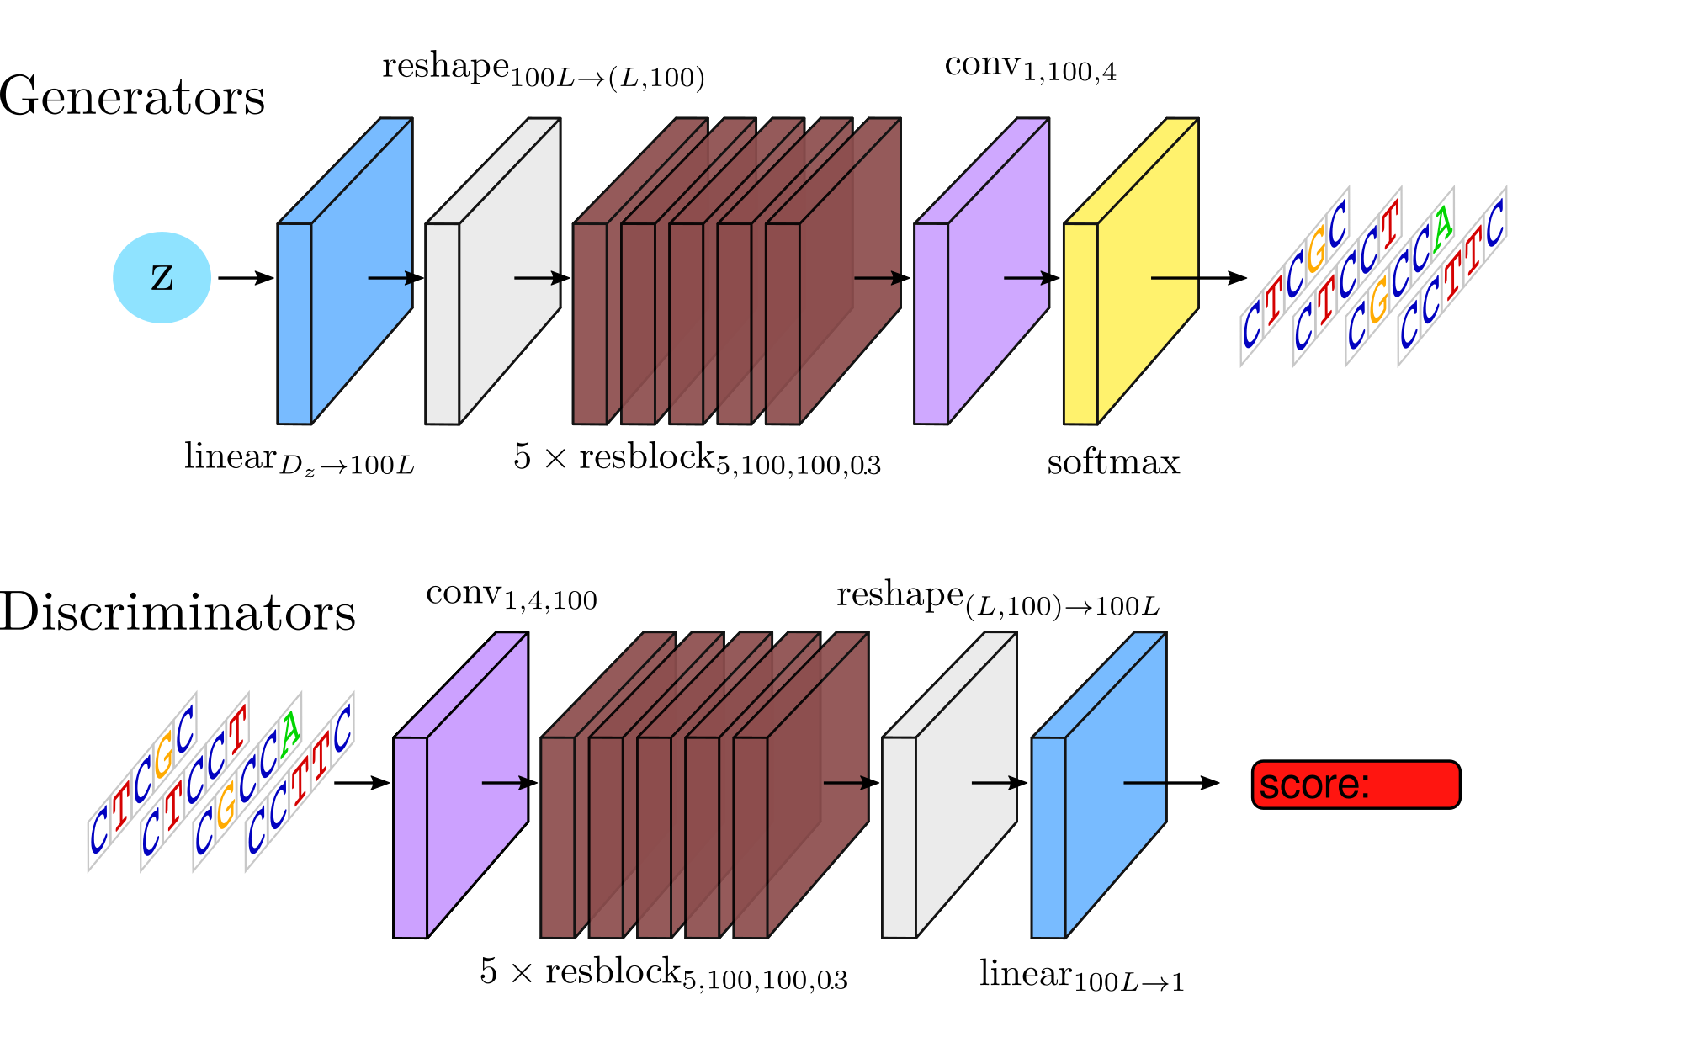

In [7]:
get_fig_from_page(14, 1050, top = 250)

- Generator learns to translate random noise into one-hot encoded sequences.
- Discriminator learns to find the patterns that correspond to *realistic* sequences.

## Datasets

- **chr1** -- They took each *line* of the chr1.fa file from hg38 as an observation. Due to the text-wrapping in the file this resulted in 50bp chunks and any line with an ambigious code was removed. A total of 4.6M lines.
- **splice-sites** -- A collection of 116K sequences of exons that are between 50 and 450 base-pairs long. The center of the exon was then used to extract 250bp in each direction. This created a set of 500bp sequences containing exactly one exon and both upstream and downstream intronic sequence.
- **protein-binding** -- A set of ~100K 34bp sequences along with their binding affinities to three transcription factors: Mad, Max, and E2f4. Not much detail into how the scores were produced besides a reference to a "personal communication" with Raluca Gordan, an Assistant Prof at Duke University who studies transcription-factor binding.


## Goals

After contruction of the model the researchers had two main research goals.
 - Confirm that the model can reconstruct *realistic* DNA by validating the model can replicate known DNA constraints.
 - Experiment with ways to use the model for DNA design.

## Question 1:

What is the fundamental structural contraint that we know about DNA? 

Complementarity!

### Dataset
chr1 -- They took each line of the chr1.fa file from hg38 as an observation. Due to the text-wrapping in the file this resulted in 50bp chunks and any line with an ambigious code was removed. A total of 4.6M lines.

### Process
- The model was trained to convergence.
- They selected 64 points in Z-space at random.
- Then used gradient descent to find the closest point to each that was all G's.
- Then they reflected the the point in Z-space ($-z_i$) and fed that point through the generator.

We would expect the sequence generated from $-z$ to be the complement of the sequence generated by $z$. 

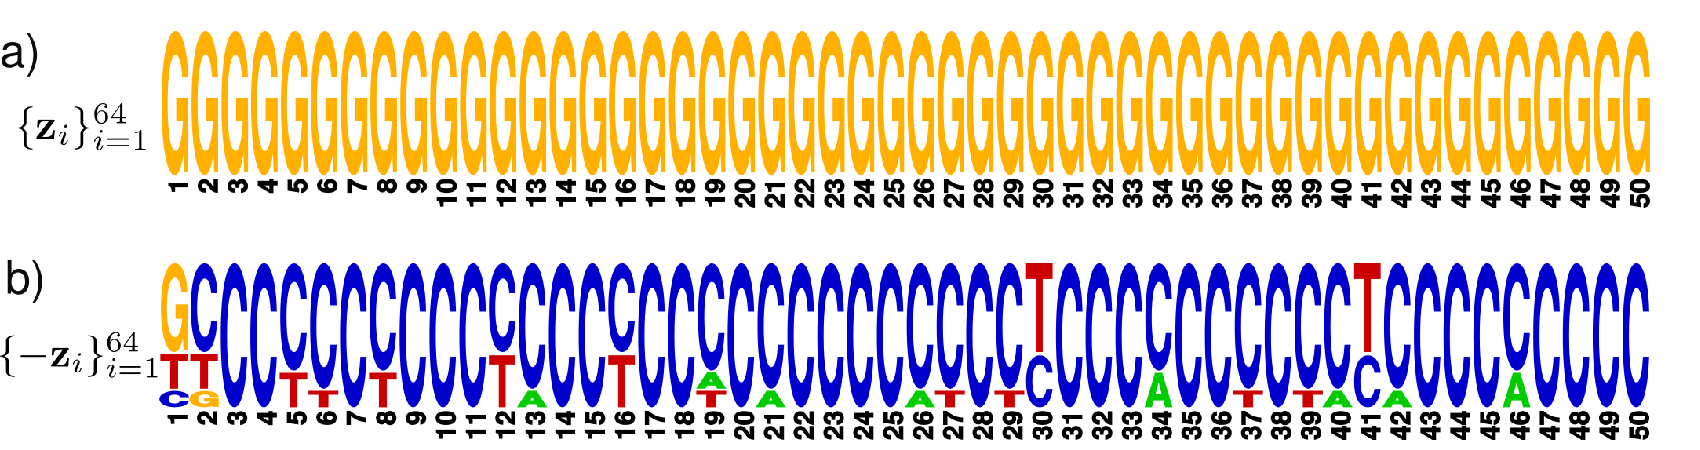

In [22]:
get_fig_from_page(5, 450, top = 1100)

It looks like it worked. There is a strong preference to all Cs. I find it a little weird that they chose such a "unrealistic" sequence, perhaps that is why the reverse complement did not work as well; all Cs probably scores low in their discriminator.

### Question 2:

What is the most useful property of a function when doing optimization?

Differentiability (smoothness). The most effective forms of numerical optimization (gradient descent & basin hopping) rely on the assumption of a smooth and easily calculatable gradient across the function.

### Dataset
chr1 -- They took each line of the chr1.fa file from hg38 as an observation. Due to the text-wrapping in the file this resulted in 50bp chunks and any line with an ambigious code was removed. A total of 4.6M lines.

### Process
- The model was trained to convergence.
- They selected 2 points in Z-space at random, point A & B.
- Then used linear interpolation to walk from A to B in 10 steps.
- Then they fed each of those steps through the generator.

We would expect the sequences generated would have a smooth progression of changing from the $G(A)$ to $G(B)$. But we also know that in the one-hot encoded scheme only one base can be present in each position. So, we expect a progressive accumulation of changes across the sequence but *hard* transitions in each channel of the output.

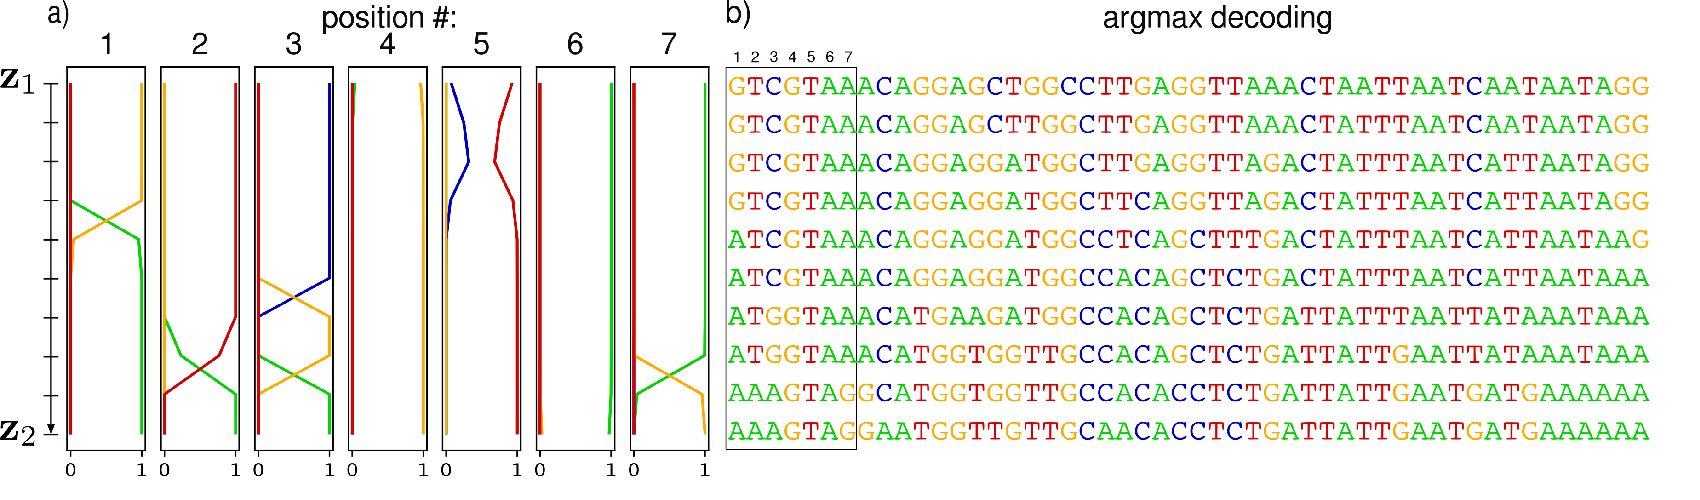

In [19]:
get_fig_from_page(5, 500)

It worked as ideally as possible. There is no accumulation of *random* mutations or switching back and forth between nucleotides.

### Question 3:

Can we replicate higher order known contraints? Specifically intron/exon splice sites.

### Dataset
splice-sites -- A collection of 116K sequences of exons that are between 50 and 450 base-pairs long. The center of the exon was then used to extract 250bp in each direction. This created a set of 500bp sequences containing exactly one exon and both upstream and downstream intronic sequence.

An additional annotation channel was added to that represented the intron/exon boundaries. The track was set to 1 for exons, 0 for introns. The generator was adjusted to produce both a 4 channel sequence call and a 1 channel intron/exon call. The discriminator was adjust to use this annotation in its critiques.

### Process
- The model was trained to convergence.
- Collect 100 random sequences.
- Determine the intron/exon boundary by finding the first position above 0.5 (exon start) and the last position above 0.5 (exon end).
- Create a sequence logo.

We would expect to see cannonical splice junctions at the positions where the boundary exists. Specfically an *AG* upstream of the exon and a *GT* just downstream of the exon boundary.

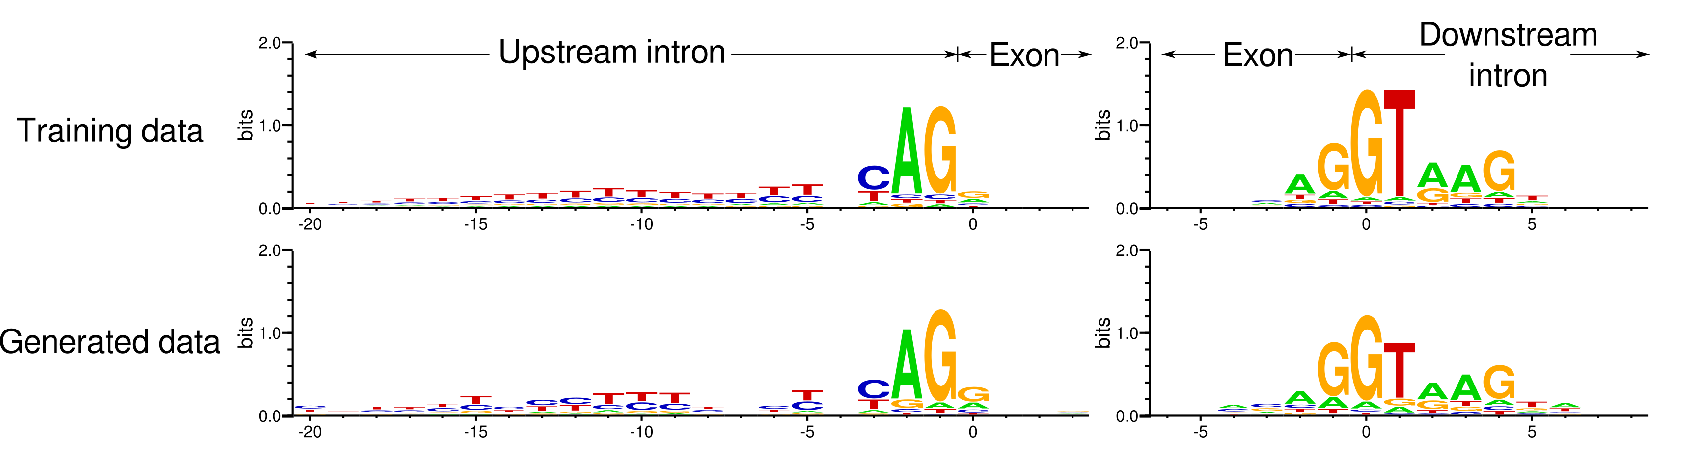

In [23]:
get_fig_from_page(6, 450, top = 1100)

That is exactly what we see. You couldn't have asked for a cleaner result.

## Generative optimization

Making random DNA is neat and exploring the latent-space can be cool but what people really want to do generate DNA that exhibits desired properties. To do this they attached a trained generative model to a *predictor* model.

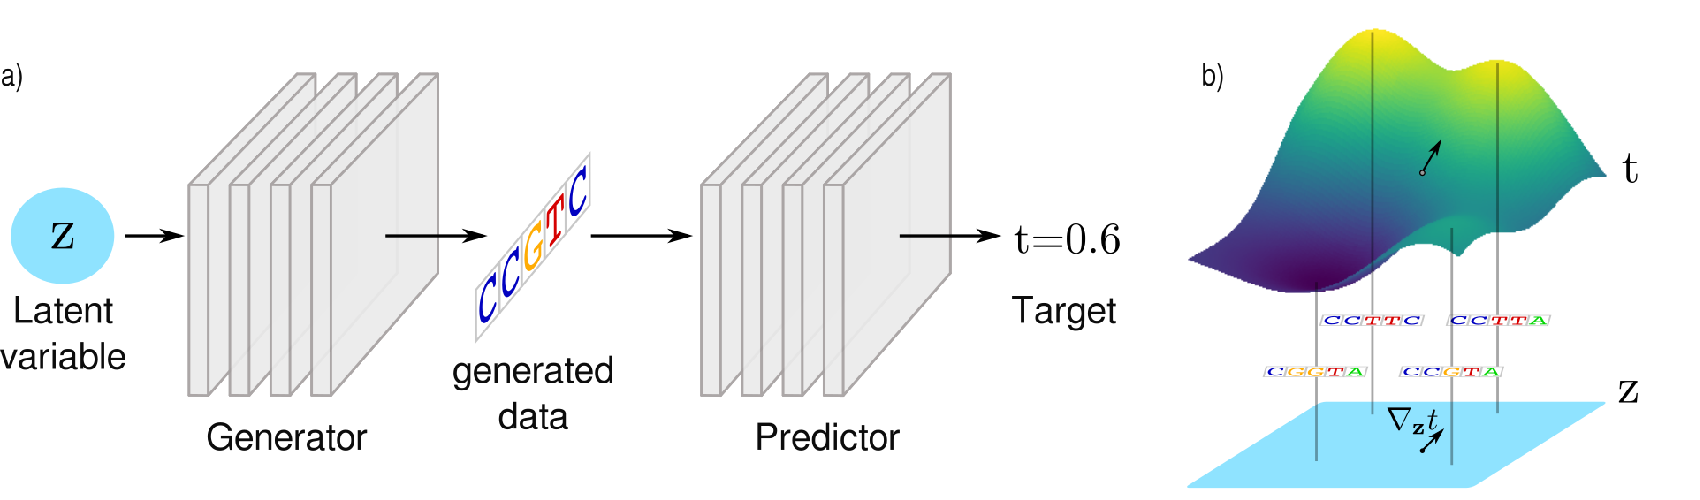

In [30]:
get_fig_from_page(4, 500, top = 400)

This allows them to create a function which maps the latent space Z to a functional call. Furthermore, because they validated that the latent space "behaves well" we can expect a smooth gradient in the predictor space.

### Dataset
protein-binding -- A set of ~100K 34bp sequences along with their binding affinities to three transcription factors: Mad, Max, and E2f4. Not much detail into how the scores were produced besides a reference to a "personal communication" with Raluca Gordan, an Assistant Prof at Duke University who studies transcription-factor binding. Looking through their papers, this was probably some sort of labeled fragment pull-down followed by deep sequencing.

These sequences were used to train a simple CNN to predict binding affinities. The predictor reached a spearman correlation 0.97.

The dataset was then split such that the sequences with binding affinities in the top 40% were removed. This is the dataset that was used for trainging the generator. This process allows the authors to see whether the generator can intuit sequences above the range it was trained on. It should also be noted that the generator does not know the binding affinities of the sequences it is trained with, just thier sequence.

### Process
- The generator and predictor were trained to convergence independently.
- The two models were then joined head-to-tail to map the latent-space Z directly to the binding space. This creates a classic global optimization problem that was solved by:
  - Randomly select N points in the latent Z-space.
  - Use gradient descent to find the most optimial point in Z-space starting with each of the N points.
- Profit.

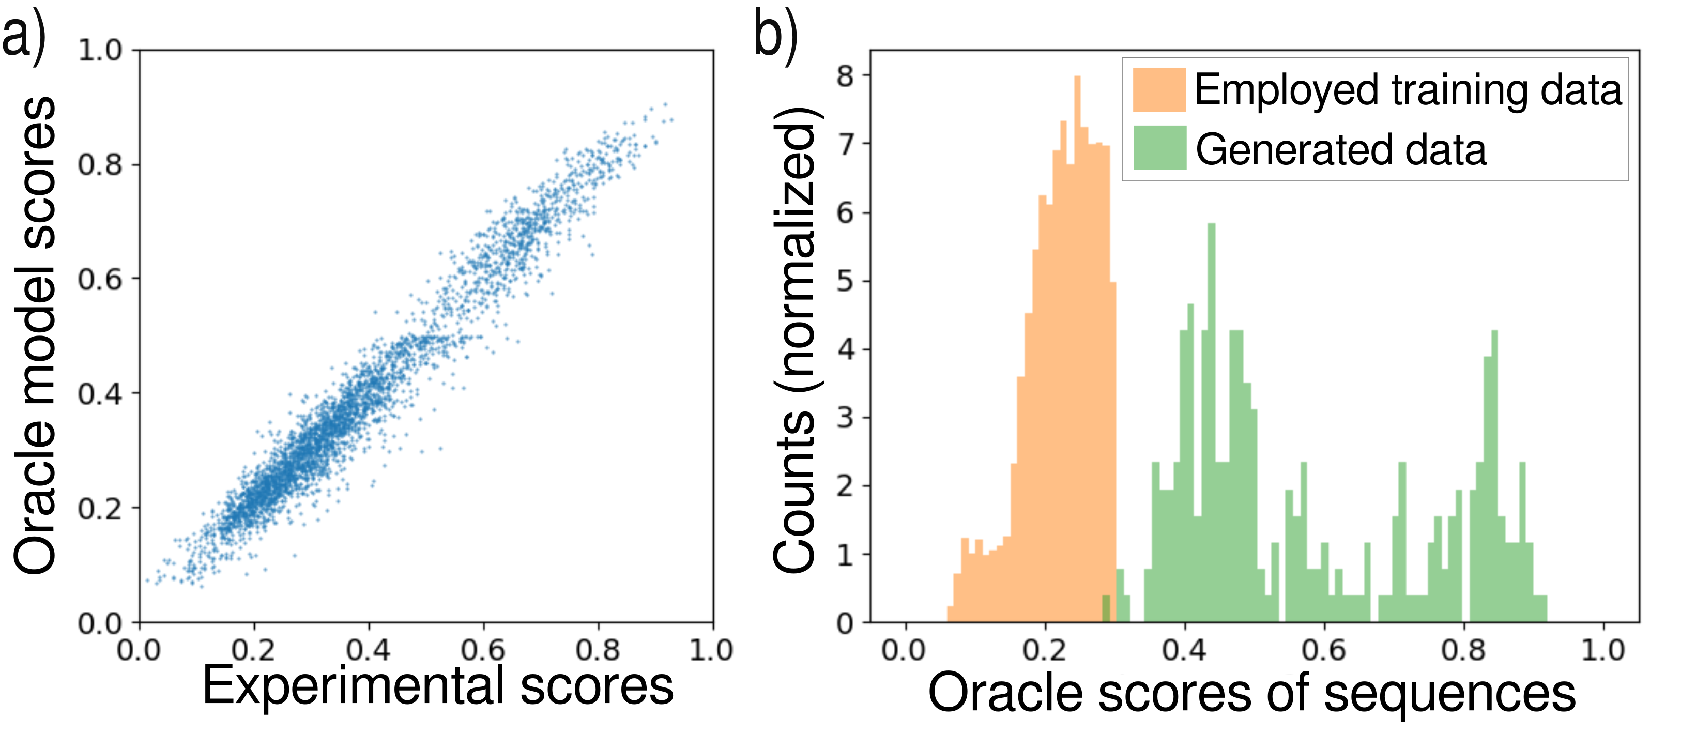

In [27]:
get_fig_from_page(8, 750)

- The left figure shows the agreement between the experimental binding data and the predicted scores. There is strong agreement.
- The right figure shows the scores from the optimization runs. There is a clear ability to generate scores above its own training data ... kind of.

    - The generator can create sequences above its own training data; but the predictor can't predict scores outside of its own range. This is a known limitation of virtually all forms of NNs.

## Conclusion

The authors were able to show that thier architecture has some useful properties:
  - Basic properties of DNA can be captured without explicit descritions. 
    - $-z_i$ is the complement of $z_i$.
    - DNA motifs and splice junctions can be replicated.
  - The model exhibits useful mathematical properties.
    - Interpolations in latent-space correspond to smooth transitions in sequence space.
    - Generators can be hooked head-to-tail with any predictive model to generate simple tools for optimizing literally anything. The predictive model does not have to be a neural network. It can be anything from a pattern matching algorithm to a webservice.

### Things I wish they did

- Explore how the model architecture impacts the mapping. Why 5 layers of residual blocks? Why not 2, why not 20? How would you even measure that? I would've liked a little more discussion around those topics.
- In newer GAN literature (possibly coming out *after* this paper) people have started including a third part to the overall model. A *reverse-generator*, this maps a sequence to its corresponding position in the latent space. This allows you find where in Z-space a particular sequence of interest is. Then you can find the most optimal sequence **near your own**.

### Things I think we can use this for

- Generate gRNAs! We can collect a large number of gRNAs from across HIV and use those as a library to train a generator. Then use CRSeek and DeepCRISPR to evaluate how effective a gRNA will be at cleaving a sequence and how well it will work across a population.
- Generate seemingly realistic HIV sequences. Can we extend them to full genes? Can we penalize those that include stop codons (defunct viruses)? Can we include a subtype category to condition the output?
- Generate broadly neutralizing antibodies. Although some Googling hasn't really turned up a good database of antibodies ... I can't even figure out how one even describes the sequence an antibody recognizes. I think this is a really fruitful area. Know anyone who needs a project?
- I think there's a cool side project in here:
  - Train the model on Tat sequences incorperating the *reverse-generator*.
  - Hook the GO predictor model we have to the end of the generator ... probably limit the output to a single neuron, like the closest related P-TEFB binding.
  - Use optimization to find a collection of sequences to test.


